In [6]:
import os
import json 
import argparse
import numpy as np
import math
import pickle
import datetime
import time
import logging
import itertools

You can specify an URL to an image:

In [14]:
url = 'https://cdn.topofart.com/images/artists/John_Singer_Sargent/paintings/sargent029.jpg'
import urllib.request
urllib.request.urlretrieve(url, "input_img.jpg")
imgpath = os.path.abspath("input_img.jpg")

Or specify an image from the styletransfer art dataset:

In [12]:
imgpath = '/home/althausc/nfs/data/coco_17_medium/val2017_styletransfer/000000000785_050351.jpg'

Show the loaded image:

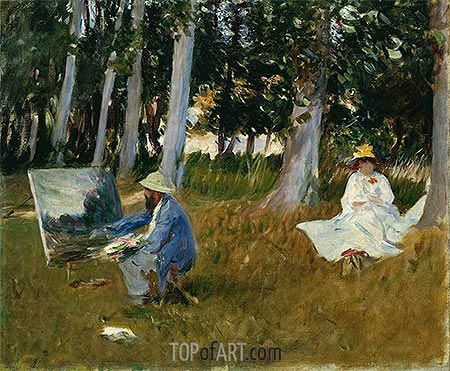

In [15]:
from IPython.display import Image, display
display(Image(filename=imgpath))

---
Run keypoint inference:

In [1]:
from predict_search_modules import predict
annpath = predict(imgpath)

NameError: name 'imgpath' is not defined

Visualize the predictions onto the image:

In [ ]:
from IPython.display import Image, display
display(Image(filename="input_img-overlay.jpg"))

---
Transform the predictions to a feature descriptor.
Please specify following parameters:
 - Method for constructing the feature vector 
 - PCA params, if necessary because of too many feature entries [Model only used when pca enabled]

In [21]:
from predict_search_modules import transform_to_gpd
methodgpd = 0 #['JcJLdLLa_reduced', 'JLd_all']
pca_on = False #True
pca_model = '/home/althausc/master_thesis_impl/posedescriptors/out/08/27_13-49-24/modelpca64.pkl'

gpdfile = transfrom_to_gpd(annpath, methodgpd, pca_on, pca_model)

ImportError: cannot import name 'transform_to_gpd'

---
Search for images in the database with similar arrangements of persons:

In [17]:
from predict_search_modules import search
method_search = 'COSSIM' #['COSSIM', 'DISTSUM']
tresh = 0.95
results = search(gpdfile, method_search, tresh)
print(results)


NameError: name 'gpdfile' is not defined

Display the search result:

In [38]:
import ipywidgets as widgets
import asyncio
from IPython.display import Javascript

class Timer:
    def __init__(self, timeout, callback):
        self._timeout = timeout
        self._callback = callback
        self._task = asyncio.ensure_future(self._job())

    async def _job(self):
        await asyncio.sleep(self._timeout)
        self._callback()

    def cancel(self):
        self._task.cancel()

def debounce(wait):
    """ Decorator that will postpone a function's
        execution until after `wait` seconds
        have elapsed since the last time it was invoked. """
    def decorator(fn):
        timer = None
        def debounced(*args, **kwargs):
            nonlocal timer
            def call_it():
                fn(*args, **kwargs)
            if timer is not None:
                timer.cancel()
            timer = Timer(wait, call_it)
        return debounced
    return decorator

slider = widgets.FloatSlider(min=0, max =1, step= 0.01, value = 1)
display(slider)
tresh = 1
@debounce(1)
def on_button_clicked(val):
     tresh = value
     display(Javascript('IPython.notebook.execute_cells_below()'))
     
     

#slider.on_click(on_button_clicked)
slider.observe(on_button_clicked, names="value")


FloatSlider(value=1.0, max=1.0, step=0.01)

Reading from file:  /home/althausc/master_thesis_impl/retrieval/out/09/03_16-45-46/result-ranking.json
threshold:  0.72
('0', {'filepath': '000000001360_072536.jpg', 'relscore': 1})
('1', {'filepath': '000000002842_060364.jpg', 'relscore': 1})
('2', {'filepath': '000000002842_086234.jpg', 'relscore': 1})
('3', {'filepath': '000000005038_054827.jpg', 'relscore': 1})
('4', {'filepath': '000000005038_062689.jpg', 'relscore': 0.9815904})
('5', {'filepath': '000000005946_055629.jpg', 'relscore': 0.9815904})
('6', {'filepath': '000000005946_058105.jpg', 'relscore': 0.7})
[1, 1, 1, 1, 0.9815904, 0.9815904]



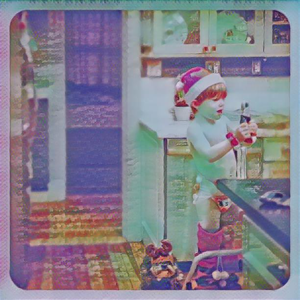
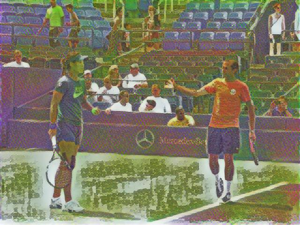
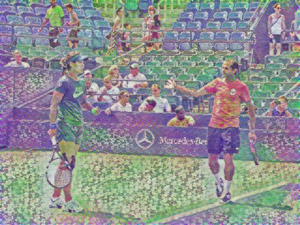
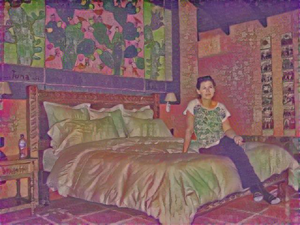
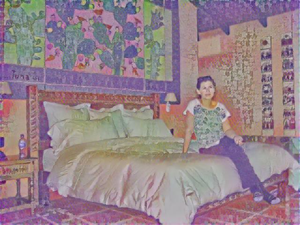
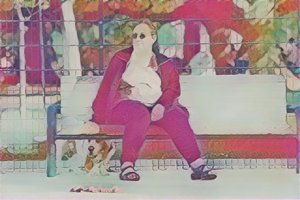

In [37]:
import ipyplot
from predict_search_modules import getImgs, treshIndex

results = '/home/althausc/master_thesis_impl/retrieval/out/09/03_16-45-46/result-ranking.json'
imgs, scores = getImgs(results)
#tresh = slider.value#0.7 #from 0.x to 1 all results
print('threshold: ',thresh)

k = treshIndex(tresh, results)

ipyplot.plot_images(imgs[:k], labels=None, scores=scores[:k], max_images=10, img_width=150)